In [37]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, f1_score, recall_score


In [38]:
data=pd.read_csv("GaltonFamilies.csv" )
print(data.shape)
print(data.columns)
data.head()

(934, 9)
Index(['rownames', 'family', 'father', 'mother', 'midparentHeight', 'children',
       'childNum', 'gender', 'childHeight'],
      dtype='object')


,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [39]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         934 non-null    int64  
 1   family           934 non-null    object 
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    object 
 8   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


rownames           0
family             0
father             0
mother             0
midparentHeight    0
children           0
childNum           0
gender             0
childHeight        0
dtype: int64

## Tiền xử lý

In [40]:
data = data.drop(columns=['rownames', 'family', 'childNum'])
data['gender'] = data['gender'].map({'male': 1, 'female': 0})
columns_cm = ['father', 'mother','midparentHeight',  'childHeight']
data[columns_cm] = data[columns_cm] * 2.54
data.head()

,father,mother,midparentHeight,children,gender,childHeight
0,199.39,170.18,191.5922,4,1,185.928
1,199.39,170.18,191.5922,4,0,175.768
2,199.39,170.18,191.5922,4,0,175.260
3,199.39,170.18,191.5922,4,0,175.260
4,191.77,168.91,187.0964,4,1,186.690


In [41]:
X = data[['father', 'mother']]
y = data['childHeight']

In [42]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## mô hình hồi quy tuyến tính

In [43]:
# Tạo mô hình hồi quy tuyến tính
lr = LinearRegression()
lr.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lr = lr.predict(X_test)

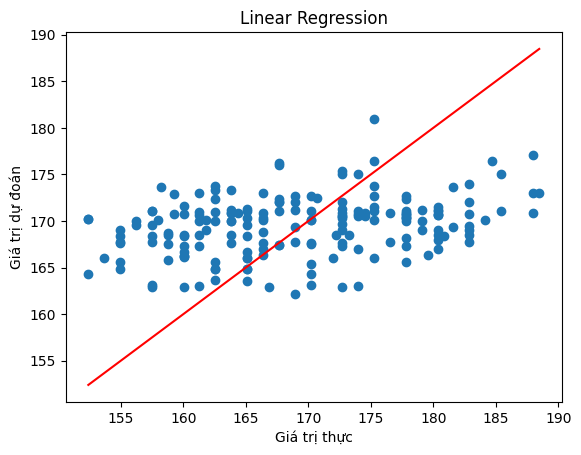

In [44]:
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Giá trị thực")
plt.ylabel("Giá trị dự đoán")
plt.title("Linear Regression")
plt.show()

In [45]:
joblib.dump(lr, 'lr_model.pkl')
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    
    print(f"MSE: {mse}")
    print(f"R^2: {r2}")
    print(f"RMSE: {rmse}")
    print()
evaluate_model(y_test, y_pred_lr, "Linear Regression") 

comparison = pd.DataFrame({'Thực tế': y_test, 'Dự đoán': y_pred_lr})
print(comparison.head(5))

MSE: 69.31764045561728
R^2: 0.09824257223752475
RMSE: 8.32572161771082

     Thực tế     Dự đoán
321  166.370  170.332574
70   184.658  176.474066
209  177.800  170.643073
549  176.530  167.766805
711  162.560  164.890536


## mô hình hồi quy Ridge

In [46]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


In [47]:
joblib.dump(ridge, 'ridge_model.pkl')
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    
    print(f"MSE: {mse}")
    print(f"R^2: {r2}")
    print(f"RMSE: {rmse}")
    print()
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

comparison = pd.DataFrame({'Thực tế': y_test, 'Dự đoán': y_pred_ridge})
print(comparison.head())

MSE: 69.31757773269499
R^2: 0.09824338820386014
RMSE: 8.325717850893998

     Thực tế     Dự đoán
321  166.370  170.332551
70   184.658  176.473824
209  177.800  170.643042
549  176.530  167.766875
711  162.560  164.890707


In [48]:
y_test_values = y_test.values
perfect_line = np.arange(len(y_test_values))

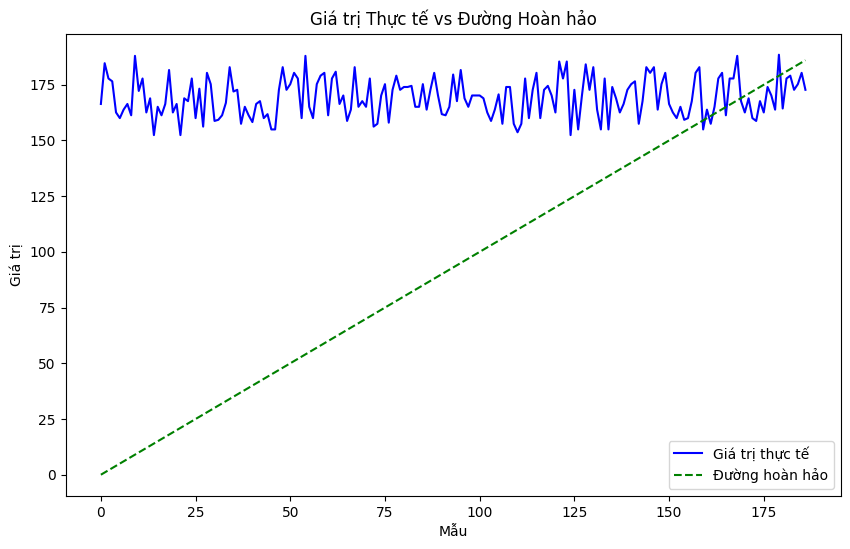

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_values, label='Giá trị thực tế', color='b')
plt.plot(perfect_line, label='Đường hoàn hảo', color='g', linestyle='--')
plt.title('Giá trị Thực tế vs Đường Hoàn hảo')
plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.legend()
plt.show()

## mô hình Neural Network

In [50]:
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
joblib.dump(mlp,'MLP.pkl')
y_pred_neural = mlp.predict(X_test)

In [51]:
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    
    print(f"MSE: {mse}")
    print(f"R^2: {r2}")
    print(f"RMSE: {rmse}")
    print()
    
evaluate_model(y_test, y_pred_neural, "Neural Network")

comparison = pd.DataFrame({'Thực tế': y_test, 'Dự đoán': y_pred_neural})
print(comparison.head())

MSE: 71.84056770907084
R^2: 0.06542165716378068
RMSE: 8.47588152991008

     Thực tế     Dự đoán
321  166.370  170.449471
70   184.658  179.997204
209  177.800  170.626230
549  176.530  166.238145
711  162.560  161.850059


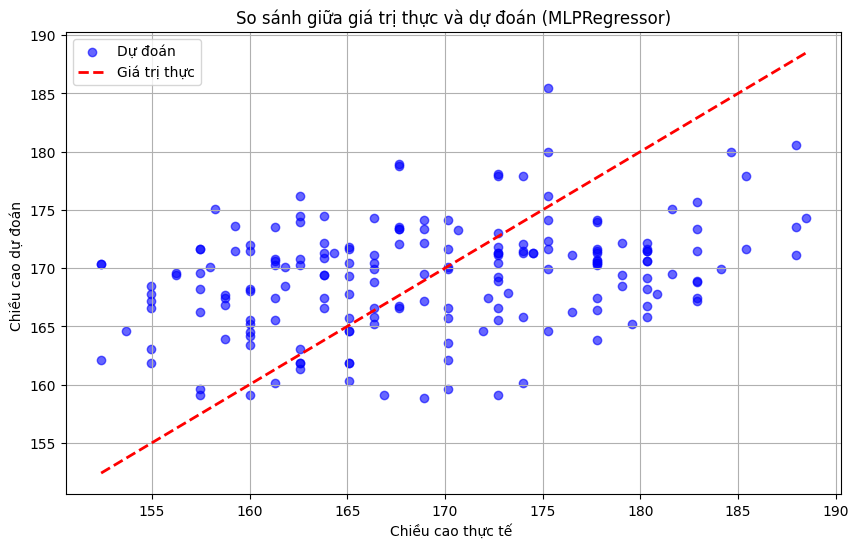

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_neural, color='blue', alpha=0.6, label="Dự đoán")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Giá trị thực")
plt.xlabel('Chiều cao thực tế ')
plt.ylabel('Chiều cao dự đoán ')
plt.title('So sánh giữa giá trị thực và dự đoán (MLPRegressor)')
plt.legend()
plt.grid(True)
plt.show()

## Stacking

In [53]:
base_models = [
    ('linear', lr),
    ('neural', mlp),
    ('ridge', ridge)
]
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)
joblib.dump(stacking_model,'Stacking.pkl')
# Đánh giá mô hình stacking
evaluate_model(y_test, y_pred_stacking, "Stacking")

comparison = pd.DataFrame({'Thực tế': y_test, 'Dự đoán': y_pred_stacking})
print(comparison.head(5))

MSE: 70.14195056784958
R^2: 0.08751907152977734
RMSE: 8.37507913800518

     Thực tế     Dự đoán
321  166.370  169.892042
70   184.658  173.400098
209  177.800  169.940074
549  176.530  168.332404
711  162.560  166.724733
